<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/Iris_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##【問題1】練習のために特徴量とカテゴリを選択

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# irisデータセットをロード
iris = load_iris()

X = {
    'sepal_length': iris.data[:, 0],
    'petal_length': iris.data[:, 2],
}

# DataFrameに変換
X = pd.DataFrame(X)

# DataFrameを表示
print(X)

     sepal_length  petal_length
0             5.1           1.4
1             4.9           1.4
2             4.7           1.3
3             4.6           1.5
4             5.0           1.4
..            ...           ...
145           6.7           5.2
146           6.3           5.0
147           6.5           5.2
148           6.2           5.4
149           5.9           5.1

[150 rows x 2 columns]


In [2]:
# VirgicolorとVirginicaのsepal_lengthとpetal_lengthデータのみをデータフレームから抽出する

from sklearn import datasets
import pandas as pd
from sklearn.datasets import load_iris

iris = datasets.load_iris()

# irisデータセットをロード
iris = load_iris()

X = {
    'sepal_length': iris.data[:, 0],
    'petal_length': iris.data[:, 2],
}

# DataFrameに変換
X = pd.DataFrame(X)

# 目的変数を追加
y = pd.DataFrame(iris.target, columns=['Species'])
iris_df = pd.concat([X,y], axis=1)

# speciesを文字列に変換
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['Species'] = iris_df['Species'].map(species_mapping)

# virgicolorとvirginicaのデータのみを抽出
iris_df_filtered = iris_df[iris_df['Species'].isin(['versicolor', 'virginica'])]

# DataFrameを表示
iris_df_filtered

,sepal_length,petal_length,Species
50,7.0,4.7,versicolor
51,6.4,4.5,versicolor
52,6.9,4.9,versicolor
53,5.5,4.0,versicolor
54,6.5,4.6,versicolor
...,...,...,...
145,6.7,5.2,virginica
146,6.3,5.0,virginica
147,6.5,5.2,virginica
148,6.2,5.4,virginica


【問題2】データの分析

<function matplotlib.pyplot.show(close=None, block=None)>

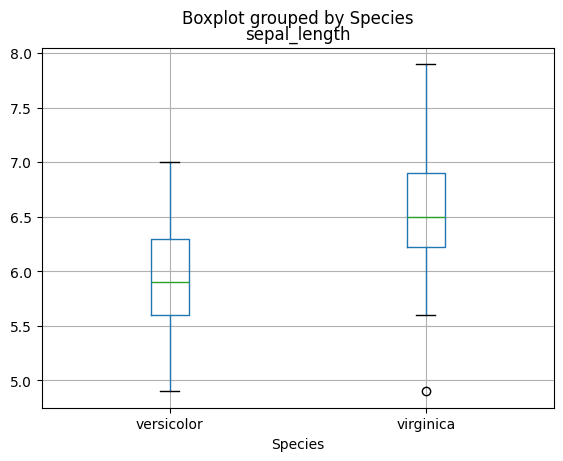

In [3]:
import matplotlib.pyplot as plt

iris_df_filtered.boxplot(column='sepal_length', by='Species')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

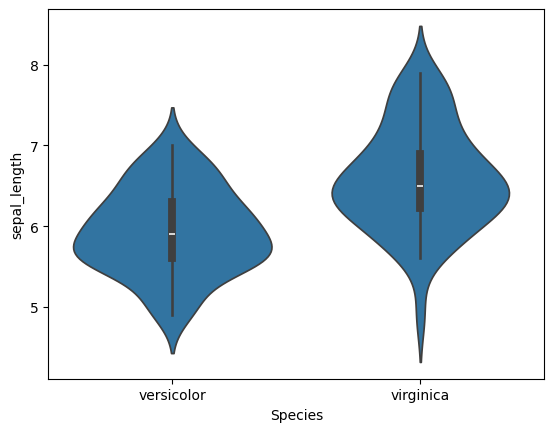

In [4]:
import seaborn as sns
sns.violinplot(x='Species', y='sepal_length', data=iris_df_filtered)
plt.show

##【問題3】前処理・訓練データと検証データの分割

In [5]:
# 訓練データ75%、検証データ25%として、train_test_splitで分割する

from sklearn.model_selection import train_test_split

# 特徴量と目的変数を分離
X = iris_df_filtered[['sepal_length', 'petal_length']]
y = iris_df_filtered['Species']

# データを訓練データと検証データに分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

# 分割結果の確認
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (75, 2)
X_val shape: (25, 2)
y_train shape: (75,)
y_val shape: (25,)


##【問題4】前処理・標準化

In [6]:
# 訓練用のデータでfitを行い、訓練用・検証用双方のデータにtransformを行う

from sklearn.preprocessing import StandardScaler

# StandardScalerのインスタンスを作成
scaler = StandardScaler()

# 訓練データでfit
scaler.fit(X_train)

# 訓練データと検証データにtransform
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("X_train_scaled:", X_train_scaled)
print("X_val_scaled:", X_val_scaled)

X_train_scaled: [[-1.77029021 -2.29778941]
 [ 0.03817879 -0.24187257]
 [-0.56464421  0.24187257]
 [ 0.18888454  0.84655399]
 [-0.11252696 -0.12093628]
 [ 0.33959029  0.24187257]
 [ 1.69594204  1.45123542]
 [ 0.64100179  0.84655399]
 [ 2.14805929  2.4187257 ]
 [-0.71534996  0.24187257]
 [ 0.64100179  0.12093628]
 [-0.11252696 -0.48374514]
 [-2.07170171 -0.48374514]
 [-0.86605571  0.12093628]
 [ 0.64100179  0.96749028]
 [ 0.18888454 -0.48374514]
 [ 0.18888454  0.48374514]
 [-0.71534996 -1.08842656]
 [-0.26323271 -0.36280885]
 [ 0.33959029 -0.36280885]
 [ 0.64100179 -0.60468142]
 [-0.71534996 -0.96749028]
 [-1.16746721 -0.60468142]
 [-1.01676146 -0.96749028]
 [-0.86605571 -0.48374514]
 [ 0.94241329  0.24187257]
 [ 1.39453054  1.45123542]
 [ 1.09311904 -0.24187257]
 [-1.31817296 -0.48374514]
 [-0.41393846 -0.48374514]
 [ 0.03817879  1.33029913]
 [-0.56464421 -0.84655399]
 [-0.41393846 -0.48374514]
 [-0.26323271 -0.24187257]
 [ 1.24382479  1.20936285]
 [-1.92099596 -1.69310799]
 [-1.1674672

##【問題5】学習と推定

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# k-NNモデルの作成 (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 訓練データで予測
y_pred_train = knn.predict(X_train)

# 訓練データの精度の確認
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))

Training Accuracy: 0.96


In [8]:
# 1-nnモデル
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# 訓練データで予測
y_pred_train = knn.predict(X_train)

# 訓練データの精度の確認
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))

Training Accuracy: 1.0


In [9]:
# 3-nnモデル
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 訓練データで予測
y_pred_train = knn.predict(X_train)

# 訓練データの精度の確認
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))

Training Accuracy: 0.9466666666666667


##【問題6】評価

In [10]:
# scikit-learnを使い4種類の指標を計算する

import pandas as pd
from sklearn.datasets import load_iris
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# k-NNモデルの作成 (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 訓練データで予測
y_pred_train = knn.predict(X_train)

# 精度、適合率、再現率、F1スコアを計算
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='macro') # 多クラス分類なのでaverage='macro'
recall = recall_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_train, y_pred_train, average='macro')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.96
Precision: 0.9604700854700854
Recall: 0.9598150782361309
F1 Score: 0.959971535314001


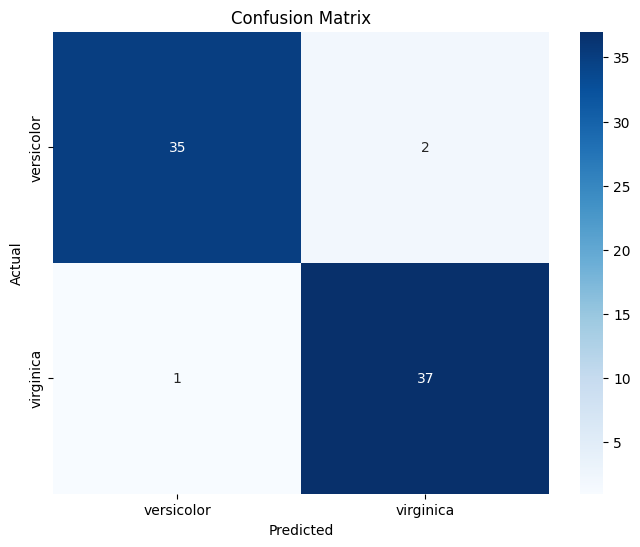

In [11]:
# 混同行列をscikit-learnを使い表示する

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 混同行列を計算
conf_matrix = confusion_matrix(y_train, y_pred_train)

# 混同行列をヒートマップで表示
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# k-NNモデルの作成 (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 訓練データで予測
y_pred_train = knn.predict(X_train)

# 精度、適合率、再現率、F1スコアを計算
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='macro') # 多クラス分類なのでaverage='macro'
recall = recall_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_train, y_pred_train, average='macro')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9466666666666667
Precision: 0.9476495726495726
Recall: 0.9470128022759602
F1 Score: 0.9466571834992887


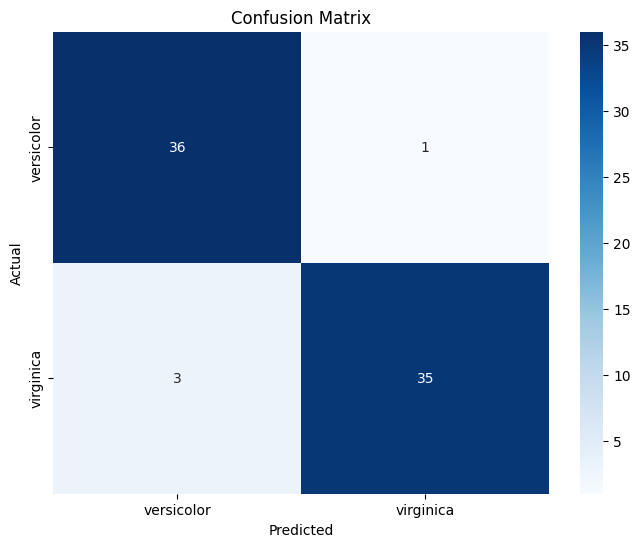

In [13]:
# 混同行列をscikit-learnを使い表示する

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 混同行列を計算
conf_matrix = confusion_matrix(y_train, y_pred_train)

# 混同行列をヒートマップで表示
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# k-NNモデルの作成 (k=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# 訓練データで予測
y_pred_train = knn.predict(X_train)

# 精度、適合率、再現率、F1スコアを計算
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='macro') # 多クラス分類なのでaverage='macro'
recall = recall_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_train, y_pred_train, average='macro')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


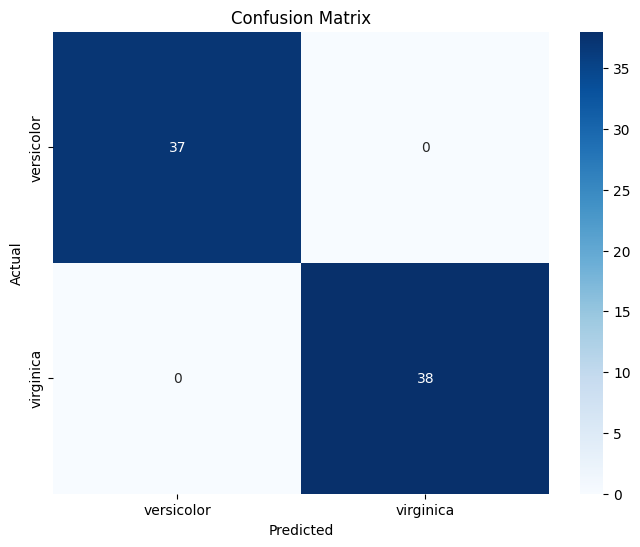

In [15]:
# 混同行列をscikit-learnを使い表示する

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 混同行列を計算
conf_matrix = confusion_matrix(y_train, y_pred_train)

# 混同行列をヒートマップで表示
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### **1. Accuracy（正解率）**
- **意味**: 全体の中で、どれだけ正しく予測できたかを示す割合。
- **計算式**:
  $
   {Accuracy} = \frac{\text{正しく予測したデータの数}}{\text{全データ数}}
   $
- **例**:  
  100件のデータのうち90件を正しく予測 → Accuracy = 90%

- **特徴**:  
  - シンプルで直感的。  
  - **クラスの偏り**があるデータ（例: ポジティブなクラスが少ない）では意味が薄れる。



### **2. Precision（適合率）**
- **意味**: モデルが「正しい」と予測したものの中で、実際に正しい割合。  
  「予測した結果がどれだけ信用できるか」を表す指標。
- **計算式**:  
  $
  {Precision} = \frac{\text{真陽性（TP）}}{\text{真陽性（TP）} + \text{偽陽性（FP）}}
  $
- **例**:  
  10件をポジティブと予測 → 実際に正しいのは8件 → Precision = 80%

- **特徴**:  
  - **重要なケース**: FP（偽陽性）を減らしたい場合（例: スパムフィルターやがん診断）。  
    → 「ポジティブ」と言うなら、確実であってほしい。



### **3. Recall（再現率）**
- **意味**: 実際に「正しい」ものの中で、どれだけ正しく予測できたか。  
  「見逃しがどれだけ少ないか」を示す指標。
- **計算式**:  
  $
  \text{Recall} = \frac{\text{真陽性（TP）}}{\text{真陽性（TP）} + \text{偽陰性（FN）}}
  $
- **例**:  
  実際にポジティブなデータが20件 → そのうち15件を正しく予測 → Recall = 75%

- **特徴**:  
  - **重要なケース**: FN（偽陰性）を減らしたい場合（例: 病気のスクリーニング）。  
    → 「ポジティブ」を取りこぼさないことが大事。


### **4. F値（F1スコア）**
- **意味**: PrecisionとRecallのバランスを取る指標。  
  一方だけが高くてもダメな場合に便利。
- **計算式**（調和平均）:  
  $
  F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $
- **例**:  
  Precision = 80%, Recall = 60% → F1 = 約69.2%

- **特徴**:  
  - PrecisionとRecallのどちらかが極端に低いと、F1スコアも低くなる。  
  - **重要なケース**: バランスが求められる場合（例: 検索エンジン、リコメンデーション）。

---

### **指標の使い分け**
| **指標**        | **適用例**                         | **ポイント**                        |
|-----------------|-----------------------------------|------------------------------------|
| Accuracy       | 全体的な性能を知りたい場合             | クラスの偏りがないときに有効。             |
| Precision       | 偽陽性を減らすことが重要な場合          | スパム検出、がんの診断などで重視される。       |
| Recall          | 偽陰性を減らすことが重要な場合          | 病気スクリーニングや犯罪検知で役立つ。        |
| F1スコア         | PrecisionとRecallのバランスを見たい場合 | PrecisionとRecallがトレードオフの場合に便利。 |

##【問題7】可視化

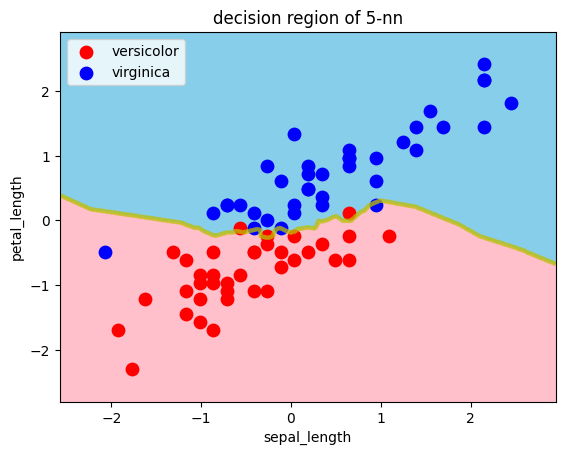

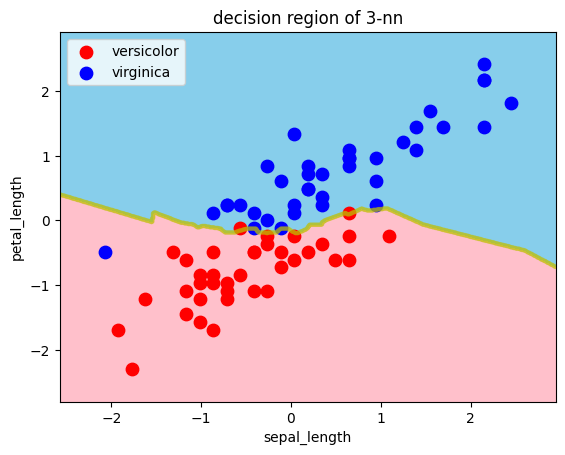

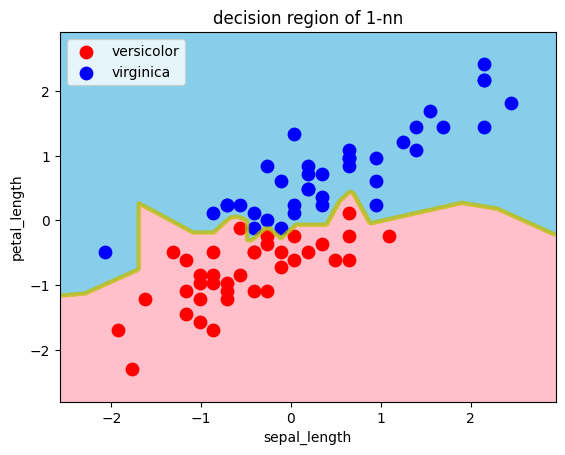

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
  """
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
  """
  ## Convert string labels in y to numerical labels if necessary
  ## Use .iloc to access the first element by position, regardless of the index
  if isinstance(y.iloc[0], str):  # Use .iloc[0] to access by position
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)

  # Setting
  scatter_color = ['red', 'blue']
  contourf_color = ['pink', 'skyblue']
  markers = ('s', 'x')
  n_class = 2

  # Pred
  mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:, 0])+0.5, step), np.arange(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5, step))
  mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
  y_pred = model.predict(mesh).reshape(mesh_f0.shape)

  ## Convert predictions to numerical if they are not already
  if isinstance(y_pred[0, 0], str):
    y_pred = le.transform(y_pred.ravel()).reshape(mesh_f0.shape)

  # Plot
  plt.title(title)
  plt.xlabel('sepal_length')
  plt.ylabel('petal_length')
  plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
  plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
  for i, target in enumerate(np.unique(y)):
    plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
  patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
  plt.legend(handles=patches)
  plt.legend()
  plt.show()

# k-NNモデルの作成 (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 可視化
decision_region(X_train_scaled, y_train, knn, title='decision region of 5-nn')

# k-NNモデルの作成 (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# 可視化
decision_region(X_train_scaled, y_train, knn, title='decision region of 3-nn')

# k-NNモデルの作成 (k=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

# 可視化
decision_region(X_train_scaled, y_train, knn, title='decision region of 1-nn')

##【問題8】他の手法の学習
学習・推定・評価・可視化
指標値を１つの表にまとめ
その表と決定領域を利用して結果を簡単に考察（どの手法がどの指標値で良かったかや、どういった決定領域になっていたか）

最近傍法
ロジスティック回帰
SVM
決定木
ランダムフォレスト

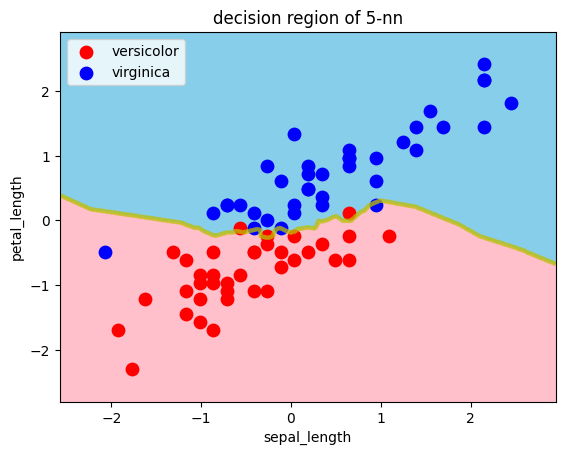

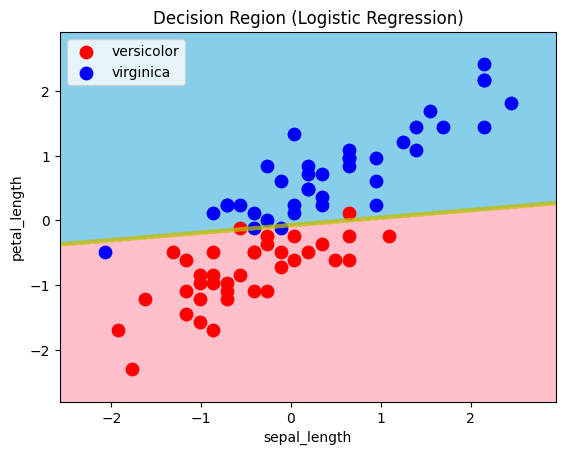

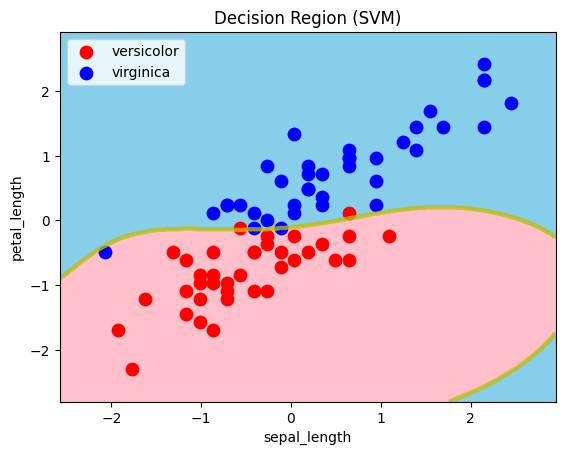

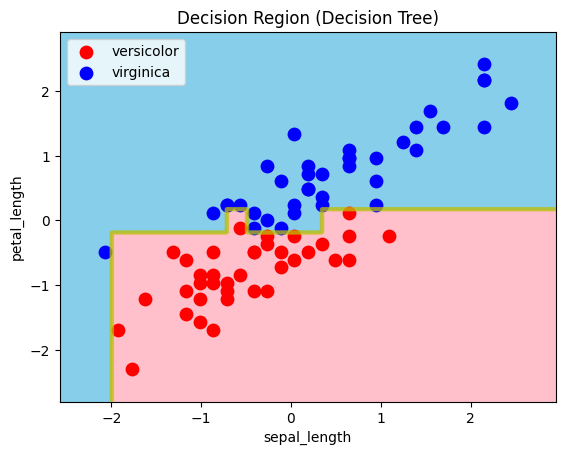

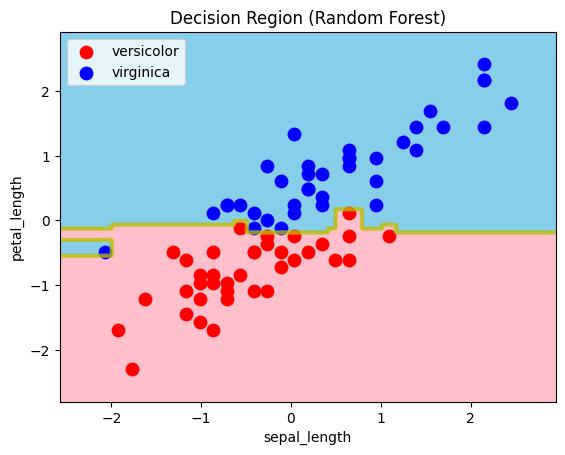

,Model,Accuracy,Precision,Recall,F1 Score
0,k-NN (k=5),0.933333,0.933761,0.933144,0.933286
1,Logistic Regression,0.933333,0.933499,0.933499,0.933333
2,SVM,0.946667,0.946657,0.946657,0.946657
3,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Random Forest,1.000000,1.000000,1.000000,1.000000


In [17]:
# 同様にSVM、決定木、ランダムフォレストでの推定も行う
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np


# k-NNモデルの作成 (k=5)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_train = knn.predict(X_train_scaled)
decision_region(X_train_scaled, y_train, knn, title='decision region of 5-nn')

# ロジスティック回帰モデルの作成
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_train_logistic = logistic_model.predict(X_train_scaled)
decision_region(X_train_scaled, y_train, logistic_model, title='Decision Region (Logistic Regression)')

# SVMモデル
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_train_svm = svm_model.predict(X_train_scaled)
decision_region(X_train_scaled, y_train, svm_model, title='Decision Region (SVM)')

# 決定木モデル
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
y_pred_train_tree = tree_model.predict(X_train_scaled)
decision_region(X_train_scaled, y_train, tree_model, title='Decision Region (Decision Tree)')

# ランダムフォレストモデル
forest_model = RandomForestClassifier()
forest_model.fit(X_train_scaled, y_train)
y_pred_train_forest = forest_model.predict(X_train_scaled)
decision_region(X_train_scaled, y_train, forest_model, title='Decision Region (Random Forest)')


def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

results = []
results.append(evaluate_model(knn, X_train_scaled, y_train, 'k-NN (k=5)'))
results.append(evaluate_model(logistic_model, X_train_scaled, y_train, 'Logistic Regression'))
results.append(evaluate_model(svm_model, X_train_scaled, y_train, 'SVM'))
results.append(evaluate_model(tree_model, X_train_scaled, y_train, 'Decision Tree'))
results.append(evaluate_model(forest_model, X_train_scaled, y_train, 'Random Forest'))

results_df = pd.DataFrame(results)
results_df

同じ手法においては、どの指標でも同程度の値になっている。
決定木とランダムフォレストは、どの指標においても、この学習データ・検証データにおいては完全に正しく推定した。

また、n=5の最近傍法では、5点を参考に線が引かれているため、無数の角で折れる折れ線が教会になっていることに対し、ロジスティック回帰では1本の直線、SVMではゆるやかな1本の曲線で分割されている。決定木とランダムフォレストは、直角の多い直線でいびつながらも正確に領域を2分けるしている。

##【問題9】標準化の有無の比較

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


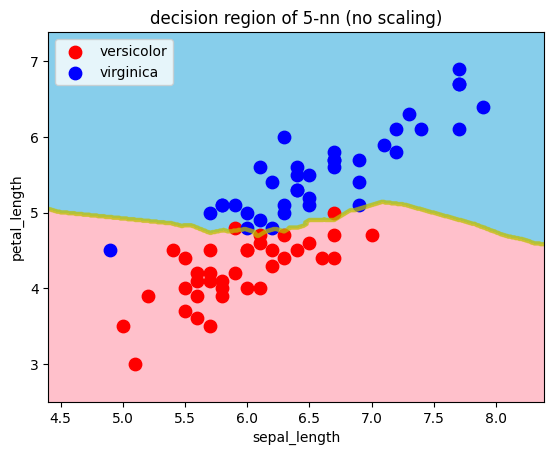

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


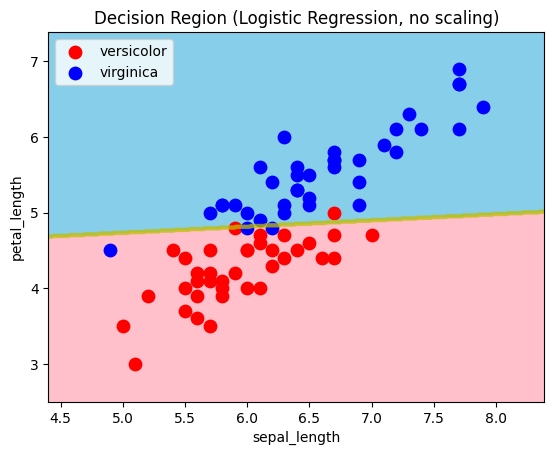

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


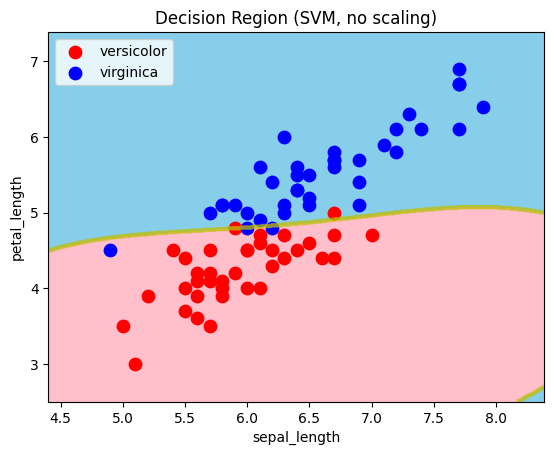

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


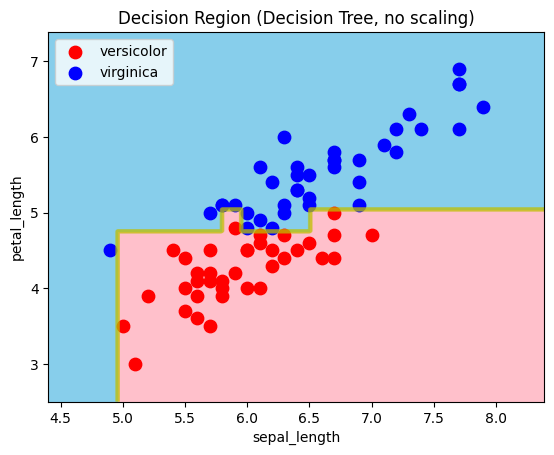

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


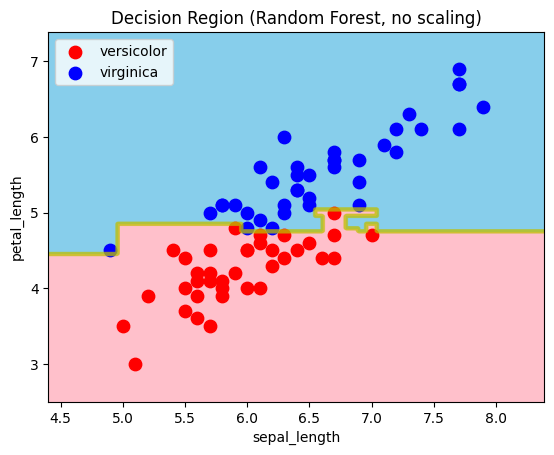

,Model,Accuracy,Precision,Recall,F1 Score
0,"k-NN (k=5, no scaling)",0.960000,0.960470,0.959815,0.959972
1,Logistic Regression (no scaling),0.946667,0.947650,0.947013,0.946657
2,SVM (no scaling),0.933333,0.933499,0.933499,0.933333
3,Decision Tree (no scaling),1.000000,1.000000,1.000000,1.000000
4,Random Forest (no scaling),1.000000,1.000000,1.000000,1.000000


In [18]:
# 標準化を行わない場合の学習と評価

# k-NNモデルの作成 (k=5)
knn_no_scale = KNeighborsClassifier(n_neighbors=5)
knn_no_scale.fit(X_train, y_train)
y_pred_train_no_scale = knn_no_scale.predict(X_train)
decision_region(np.array(X_train), y_train, knn_no_scale, title='decision region of 5-nn (no scaling)')

# ロジスティック回帰モデルの作成
logistic_model_no_scale = LogisticRegression()
logistic_model_no_scale.fit(X_train, y_train)
y_pred_train_logistic_no_scale = logistic_model_no_scale.predict(X_train)
decision_region(np.array(X_train), y_train, logistic_model_no_scale, title='Decision Region (Logistic Regression, no scaling)')

# SVMモデル
svm_model_no_scale = SVC()
svm_model_no_scale.fit(X_train, y_train)
y_pred_train_svm_no_scale = svm_model_no_scale.predict(X_train)
decision_region(np.array(X_train), y_train, svm_model_no_scale, title='Decision Region (SVM, no scaling)')

# 決定木モデル
tree_model_no_scale = DecisionTreeClassifier()
tree_model_no_scale.fit(X_train, y_train)
y_pred_train_tree_no_scale = tree_model_no_scale.predict(X_train)
decision_region(np.array(X_train), y_train, tree_model_no_scale, title='Decision Region (Decision Tree, no scaling)')

# ランダムフォレストモデル
forest_model_no_scale = RandomForestClassifier()
forest_model_no_scale.fit(X_train, y_train)
y_pred_train_forest_no_scale = forest_model_no_scale.predict(X_train)
decision_region(np.array(X_train), y_train, forest_model_no_scale, title='Decision Region (Random Forest, no scaling)')

results_no_scale = []
results_no_scale.append(evaluate_model(knn_no_scale, X_train, y_train, 'k-NN (k=5, no scaling)'))
results_no_scale.append(evaluate_model(logistic_model_no_scale, X_train, y_train, 'Logistic Regression (no scaling)'))
results_no_scale.append(evaluate_model(svm_model_no_scale, X_train, y_train, 'SVM (no scaling)'))
results_no_scale.append(evaluate_model(tree_model_no_scale, X_train, y_train, 'Decision Tree (no scaling)'))
results_no_scale.append(evaluate_model(forest_model_no_scale, X_train, y_train, 'Random Forest (no scaling)'))

results_df_no_scale = pd.DataFrame(results_no_scale)
results_df_no_scale

標準化を行う前と後では、SVMのみ各指標値が大きくなった。決定木やランダムフォレストは前後ともに正確であるが、最近傍法とロジスティック回帰において標準化することで正確性が若干下がっている。

実際は、距離計算に基づくアルゴリズム（最近傍法など）で大きなスケールの変数が計算結果を歪めるのを防いだり、勾配降下法を用いるアルゴリズム（ロジスティック回帰など）で特徴量のスケールが揃っている方が収束が早くなったりするため、通常、標準化が有効（ランダムフォレストや決定木はスケールに依存しないため、標準化の効果は限定的）である。
サンプル数が少ないことが今回の評価結果のようになった原因と考えられる。

##【問題10】すべての目的変数を使用して精度が高い手法

In [19]:
# setosa, versicolor, virginicaの3種類全てを用いた多値分類で、各モデルでの学習・推定を行う

import pandas as pd
from sklearn.datasets import load_iris
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Function to evaluate models
def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Train and evaluate different models
models = [
    ('k-NN (k=5)', KNeighborsClassifier(n_neighbors=5)),
    ('Logistic Regression', LogisticRegression(max_iter=1000)), # Increased max_iter
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

results = []
for name, model in models:
  model.fit(X_train_scaled, y_train)
  results.append(evaluate_model(model, X_val_scaled, y_val, name))

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,k-NN (k=5),0.973684,0.966667,0.979167,0.971703
1,Logistic Regression,0.973684,0.966667,0.979167,0.971703
2,SVM,0.973684,0.966667,0.979167,0.971703
3,Decision Tree,0.973684,0.966667,0.979167,0.971703
4,Random Forest,0.973684,0.966667,0.979167,0.971703


In [20]:
# 全部のモデルで各指標値が同じなのは怪しい。クラスごとの分布を確認
print("Training set class distribution:", np.bincount(y_train))
print("Validation set class distribution:", np.bincount(y_val))

Training set class distribution: [37 34 41]
Validation set class distribution: [13 16  9]


In [25]:
#それぞれの評価値ごとに見てみる
for model_name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    print(f"{model_name}: {recall_score(y_val, y_pred, average='macro')}")

k-NN (k=5): 0.9791666666666666
Logistic Regression: 0.9791666666666666
SVM: 0.9791666666666666
Decision Tree: 0.9791666666666666
Random Forest: 0.9791666666666666


In [26]:
from sklearn.model_selection import cross_val_score

for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} cross-validation accuracy: {np.mean(scores)}")

k-NN (k=5) cross-validation accuracy: 0.9553359683794467
Logistic Regression cross-validation accuracy: 0.9379446640316207
SVM cross-validation accuracy: 0.9561264822134387
Decision Tree cross-validation accuracy: 0.9553359683794467
Random Forest cross-validation accuracy: 0.9462450592885375


結局、クロス検証を行ってみた結果としては僅かにSVMのaccuracyが高かった。次いでk=5の最近傍法と決定木が同程度のaccuracyで、今回のデータにおいてはロジスティック回帰のスコアが低かった。